In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


corrientes = pd.read_csv('corrientes.csv')
potencias = pd.read_csv('potencias.csv')

corrientes['timestamp'] = pd.to_datetime(corrientes['timestamp'])
potencias['timestamp'] = pd.to_datetime(potencias['timestamp'])

# Unir los dataframes en base al ID y timestamp
merged_df = pd.merge(corrientes, potencias, on=['id', 'timestamp'])

# Separar la columna de timestamp en año, mes, día, hora, minuto
merged_df['año'] = merged_df['timestamp'].dt.year
merged_df['mes'] = merged_df['timestamp'].dt.month
merged_df['dia'] = merged_df['timestamp'].dt.day
merged_df['hora'] = merged_df['timestamp'].dt.hour
merged_df['minuto'] = merged_df['timestamp'].dt.minute

# Seleccionar y reorganizar las columnas en el formato deseado
final_df = merged_df[['año', 'mes', 'dia', 'hora', 'minuto', 'activa', 'reactiva', 'aparente', 'l1', 'l2', 'l3']]

# Mostrar el dataframe resultante
print(final_df)

         año  mes  dia  hora  minuto  activa  reactiva  aparente     l1  \
0       2021    1    1     0       0  13.584     9.264    16.444  29.16   
1       2021    1    1     0      15  12.492     9.840    15.904  27.30   
2       2021    1    1     0      30  12.468    10.056    16.016  27.12   
3       2021    1    1     0      45  13.032     9.060    15.872  27.18   
4       2021    1    1     1       0  12.540     9.720    15.868  27.12   
...      ...  ...  ...   ...     ...     ...       ...       ...    ...   
117200  2024    5    6     8      45  45.840     3.564    45.980  74.16   
117201  2024    5    6     9       0  52.092     3.084    52.184  77.97   
117202  2024    5    6     9      15  51.996     2.448    52.052  74.55   
117203  2024    5    6     9      30  53.472     2.316    53.524  77.43   
117204  2024    5    6     9      45  59.472     2.280    59.516  82.71   

            l2     l3  
0        25.62  20.85  
1        24.81  20.34  
2        25.56  20.64  
3  

#
aa
#Ver
#
ss

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = final_df.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Mostrar el mapa de calor
plt.show()

# Mostrar las correlaciones con la potencia activa
print(corr_matrix['activa'])

In [ ]:

plt.plot(final_df["activa"],'b', linewidth = 2)
plt.rcParams['figure.figsize'] = [20, 20]

plt.grid(True)
plt.title("Potencias 2018-2020 (INTEMA)", fontsize = 25)
plt.xlabel("Tiempo", fontsize = 20)
#plt.ylabel("P [kW]", fontsize = 20)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.show


In [ ]:
final_df_copy = final_df.copy()

In [ ]:
final_df_copy.to_csv('dataframe.csv', index=False) 

In [ ]:

# Función para crear ventanas deslizantes
def create_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i:i-6 + window_size])  # Indexar correctamente para un array unidimensional
    return np.array(X), np.array(y)

# Crear las ventanas deslizantes
mediciones_ventana = 12


activapre, activapost = create_windows(final_df_copy['activa'], mediciones_ventana)
aparentepre, aparentepost = create_windows(final_df_copy['aparente'], mediciones_ventana)
reactivapre, reactivapost = create_windows(final_df_copy['reactiva'], mediciones_ventana)
mespre, mespost = create_windows(final_df_copy['mes'], mediciones_ventana)
diapre, diapost = create_windows(final_df_copy['dia'], mediciones_ventana)
minutopre, minutopost = create_windows(final_df_copy['minuto'], mediciones_ventana)
i1pre, i1post = create_windows(final_df_copy['l1'], mediciones_ventana)
i2pre, i2post = create_windows(final_df_copy['l2'], mediciones_ventana)
i3pre, i3post = create_windows(final_df_copy['l3'], mediciones_ventana)

#print(activapre)
print(activapost)

In [ ]:
hay_nans = np.isnan(final_df_copy["aparente"]).any()

if hay_nans:
    print("El vector contiene valores NaN.")
else:
    print("El vector no contiene valores NaN.")

indices_nan = np.where(pd.isna(final_df_copy["aparente"]))

# Mostrar los índices donde se encuentran NaN
print("Índices donde se encuentran NaN:", indices_nan)
print(final_df_copy["aparente"][12819])

In [ ]:
#Armamos los datos con el formato que queremos
X = np.concatenate([activapre, aparentepre, reactivapre, mespre, diapre, minutopre, i1pre, i2pre, i3pre], axis=1)
y = activapost  # Supongamos que queremos predecir la 'activa' post ventana

archivo_salida = 'datos.txt'

nombre_columna = 'X'

# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre las filas del array X
    for fila in X:
        # Convierte cada fila a una cadena de texto con valores separados por comas
        fila_str = ','.join(map(str, fila))
        # Escribe la fila en el archivo y añade una nueva línea
        f.write(f"{fila_str}\n")


In [ ]:
# Proporciones para cada conjunto
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Divide los datos en entrenamiento y temporal (validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_size), random_state=42)

# Calcula la proporción de validación y prueba en el conjunto temporal
val_size_temp = val_size / (val_size + test_size)

# Divide el conjunto temporal en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1 - val_size_temp), random_state=42)

# Verifica las formas de los conjuntos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)

In [ ]:
hay_nans = np.isnan(y).any()

if hay_nans:
    print("El vector contiene valores NaN.")
else:
    print("El vector no contiene valores NaN.")

In [ ]:

scalerX = StandardScaler()
scalery = StandardScaler()

# Assuming y is a 1D array, reshape it to 2D
y_reshaped = y.reshape(-1, 1)

# Fit and transform X and y_scaled
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.fit_transform(X_test)


y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = scalery.fit_transform(y_train)
y_val = scalery.fit_transform(y_val)
y_test = scalery.fit_transform(y_test)


In [ ]:
promedio = np.nanmean(y_train)
# Reemplazar NaN por el promedio calculado
y_train[np.isnan(y_train)] = promedio

promedio = np.nanmean(X_train)
# Reemplazar NaN por el promedio calculado
X_train[np.isnan(X_train)] = promedio

promedio = np.nanmean(X_val)
# Reemplazar NaN por el promedio calculado
X_val[np.isnan(X_val)] = promedio

promedio = np.nanmean(y_val)
# Reemplazar NaN por el promedio calculado
y_val[np.isnan(y_val)] = promedio

promedio = np.nanmean(X_test)
# Reemplazar NaN por el promedio calculado
X_test[np.isnan(X_test)] = promedio

promedio = np.nanmean(y_test)
# Reemplazar NaN por el promedio calculado
y_test[np.isnan(y_test)] = promedio


In [ ]:
print(X_train.shape)  
print(y_train.shape) 

In [ ]:
y_train = y_train.reshape(-1, 6)
y_val = y_val.reshape(-1, 6)


In [ ]:

model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(42, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(6, activation='linear')) # Suponiendo que estás prediciendo un valor continuo

# Definir el optimizador con el learning rate deseado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo especificando el optimizador y otras configuraciones
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()


#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), callbacks=[early_stopping],  verbose=1)
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), verbose=1)


# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.axvline(x=len(history.history['loss']) - early_stopping.patience, color='r', linestyle='--', label='Early Stopping')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica del MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
#plt.axvline(x=len(history.history['mae']) - early_stopping.patience, color='r', linestyle='--', label='Early Stopping')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
copia_datos = X
copia_datos
copia_datos2 = copia_datos
print(copia_datos)

In [ ]:
datos_escalados = scalerX.fit_transform(copia_datos2)
print(datos_escalados)

In [ ]:
datos_desescalados = scalerX.inverse_transform(datos_escalados)
print(datos_desescalados)

In [ ]:
print(X_test.shape) 
X_test[7336]

In [ ]:
X_test[:,4]

archivo_salida = "datos_en_test.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for valor_y in X_test:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{valor_y}\n")


X_test_desestandarizado = scalerX.inverse_transform(X_test)
archivo_salida = "datos_en_test_desestandarizado.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in X_test_desestandarizado:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")


archivo_salida = "datos_en_x.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in X:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")

In [ ]:
y_test = scalery.inverse_transform(y_test)


In [ ]:
y_test

1/1 [==============================] - 0s 26ms/step
predichos
[[17.587881 22.166075 25.536455 30.354376 35.97445  40.31394 ]]
en test esa pos tenia
[17.772 21.456 26.232 30.924 35.292 41.34 ]


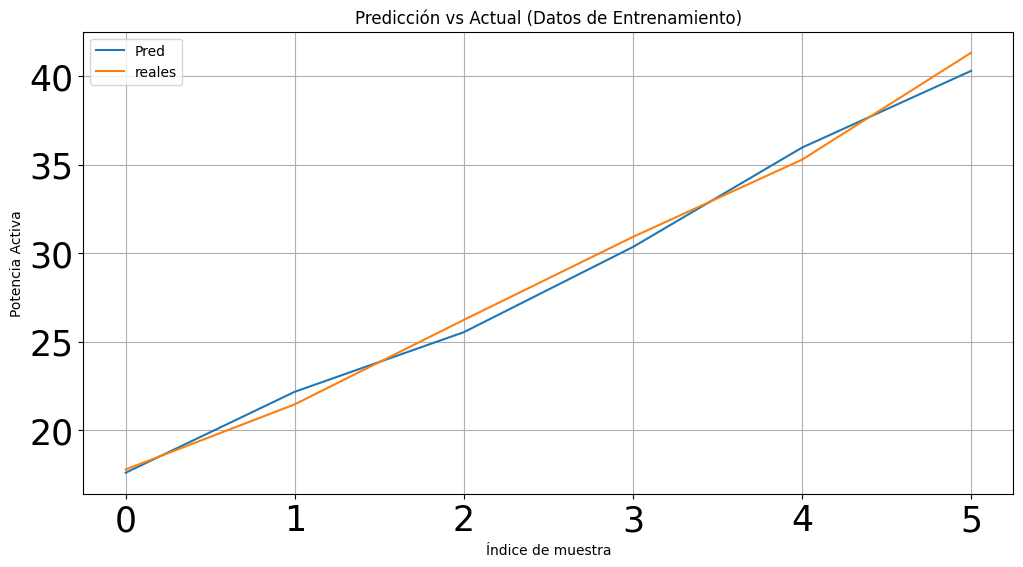

In [56]:
y_test_pred = model.predict(X_test[208,:].reshape(1, -1))

y_test_pred = scalery.inverse_transform(y_test_pred)
print("predichos")
print(y_test_pred)

predichos = y_test_pred.reshape(6,-1)
reales = np.array(y_test[208,:])
print("en test esa pos tenia")
print(y_test[208,:])
reales = reales.reshape(6, -1)
#print(reales)

x_values = np.arange(0, 6, 1) 
#print(x_values.shape)

plt.figure(figsize=(12, 6))
plt.plot(x_values,predichos, label='Pred')
plt.plot(x_values,reales, label='reales')
plt.xlabel('Índice de muestra')
plt.ylabel('Potencia Activa')
plt.title('Predicción vs Actual (Datos de Entrenamiento)')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 29ms/step
predichos
[[15.32028   15.610118  15.2789755 15.263237  14.65367   13.144466 ]]
en test esa pos tenia
[15.408 15.156 15.444 15.024 14.724 13.044]


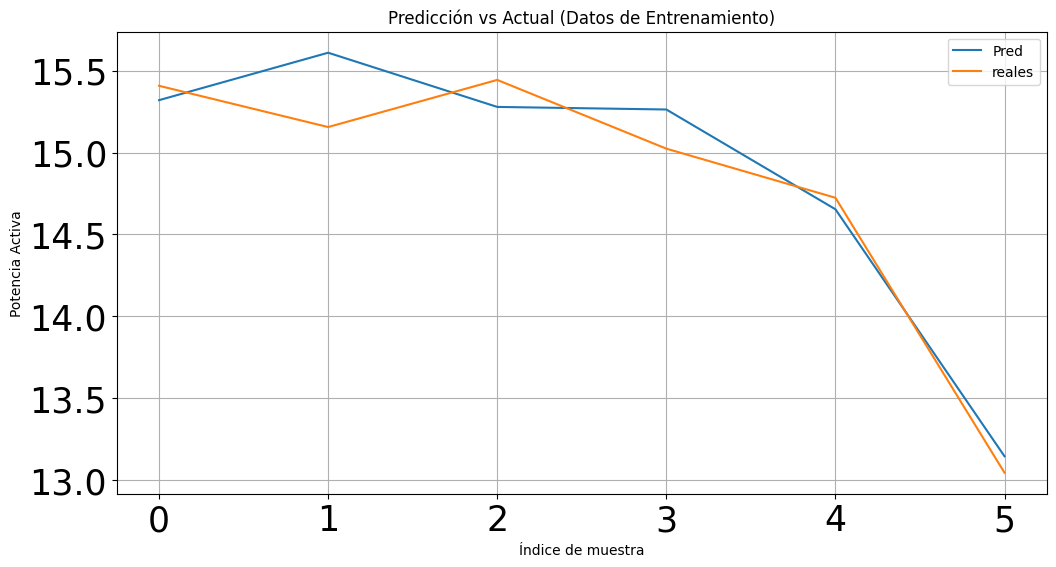

In [57]:
y_test_pred = model.predict(X_test[209,:].reshape(1, -1))

y_test_pred = scalery.inverse_transform(y_test_pred)
print("predichos")
print(y_test_pred)

predichos = y_test_pred.reshape(6,-1)
reales = np.array(y_test[209,:])
print("en test esa pos tenia")
print(y_test[209,:])
reales = reales.reshape(6, -1)
#print(reales)

x_values = np.arange(0, 6, 1) 
#print(x_values.shape)

plt.figure(figsize=(12, 6))
plt.plot(x_values,predichos, label='Pred')
plt.plot(x_values,reales, label='reales')
plt.xlabel('Índice de muestra')
plt.ylabel('Potencia Activa')
plt.title('Predicción vs Actual (Datos de Entrenamiento)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
y_test = y_test.reshape(-1, 6)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que model es tu modelo ya entrenado y X_test, y_test son tus datos de prueba
# Hacemos predicciones
y_test_pred = model.predict(X_test)

has_nan = np.isnan(y_test_pred).any()
print("¿Hay NaN en los datos y_test_pred?", has_nan)
nan_positions = np.argwhere(np.isnan(y_test_pred))
print("Posiciones de NaN en los datos X:")
print(nan_positions)

y_test_pred[np.isnan(y_test_pred)] = promedio

y_test_pred = scalery.inverse_transform(y_test_pred)



has_nan = np.isnan(y_test).any()
print("¿Hay NaN en los datos y_Test?", has_nan)
nan_positions = np.argwhere(np.isnan(y_test))
print("Posiciones de NaN en los datos X:")
print(nan_positions)

y_test[np.isnan(y_test)] = promedio


# Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_test_pred)



# Calculamos otras métricas de error
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Imprimimos las métricas de error
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Definimos un margen de error aceptable (por ejemplo, 10 unidades) 12.45
margin_of_error = 4

# Calculamos cuántas predicciones están dentro del margen de error
within_margin = np.sum(np.abs(y_test - y_test_pred) <= margin_of_error)
total_predictions = len(y_test)
accuracy_within_margin = within_margin / total_predictions

# Imprimimos la precisión dentro del margen de error
print(f'Número de predicciones dentro del margen de error: {within_margin}')
print(f'Precisión dentro del margen de error: {accuracy_within_margin:.2%}')

print(y_test_pred)
print(y_test)



In [ ]:
archivo_salida = "datos_estimados.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in y_test_pred:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")

In [ ]:
archivo_salida = "datos_en_y_test.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in y_test:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")

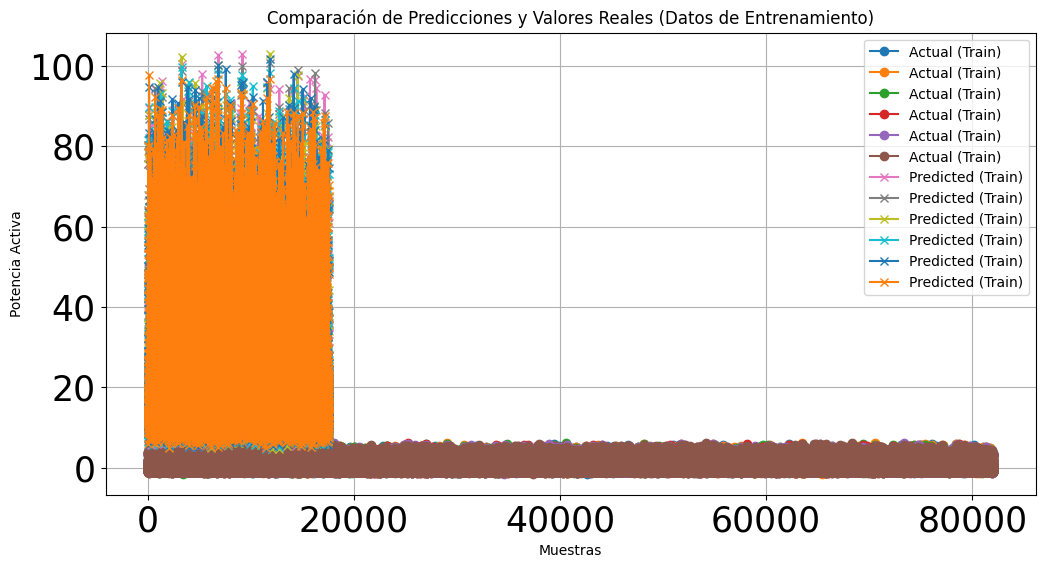

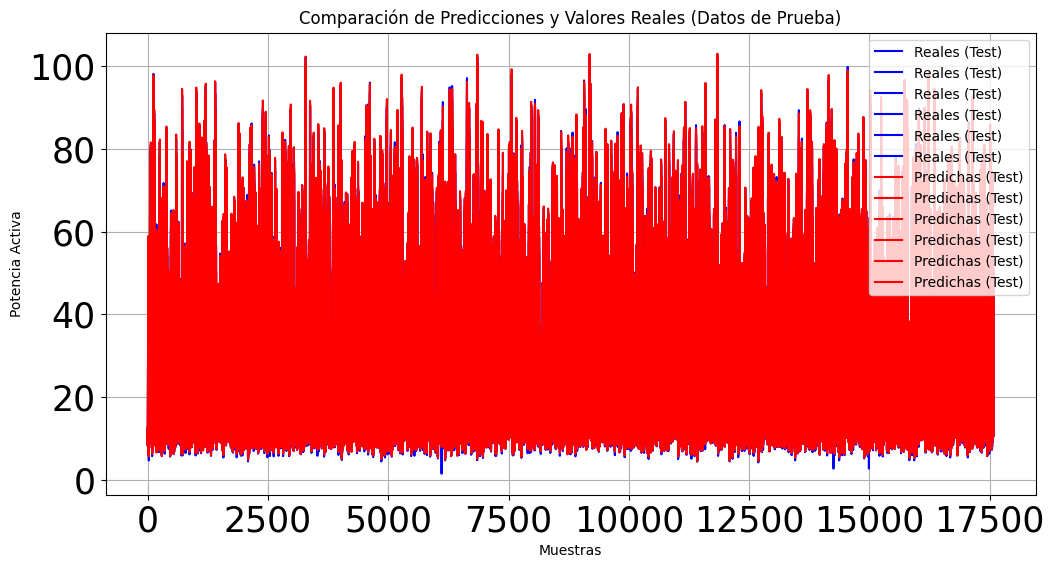

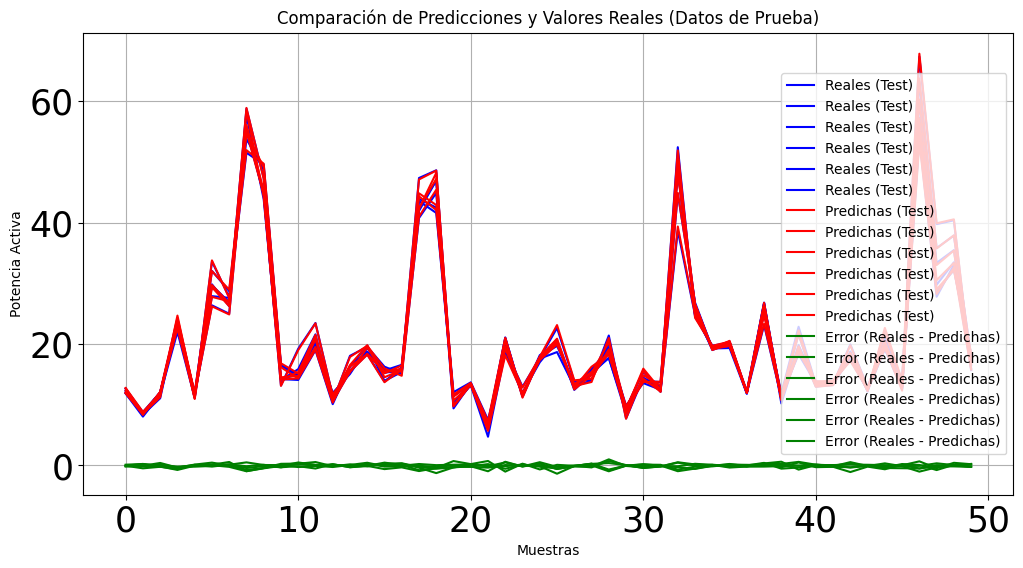

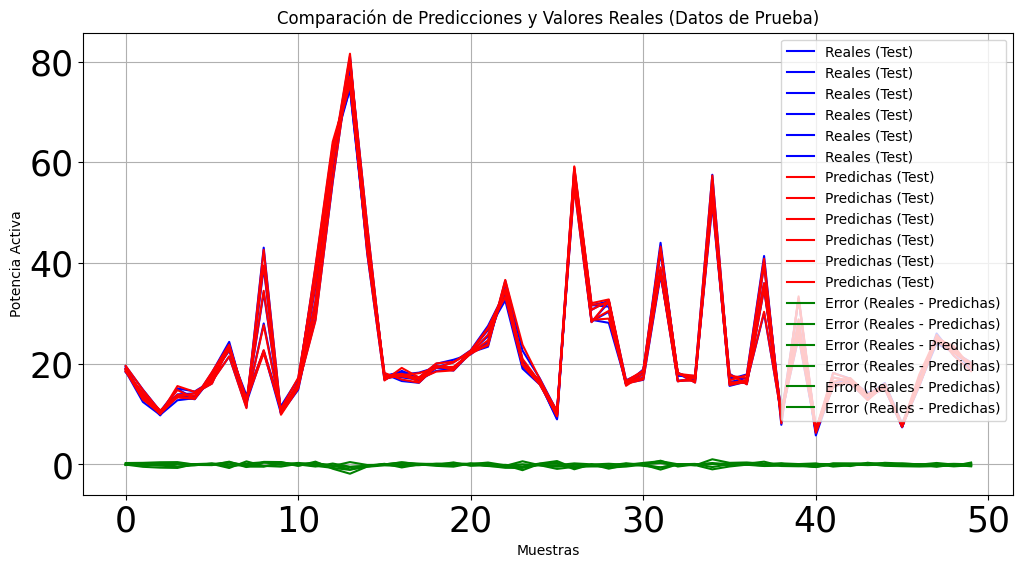

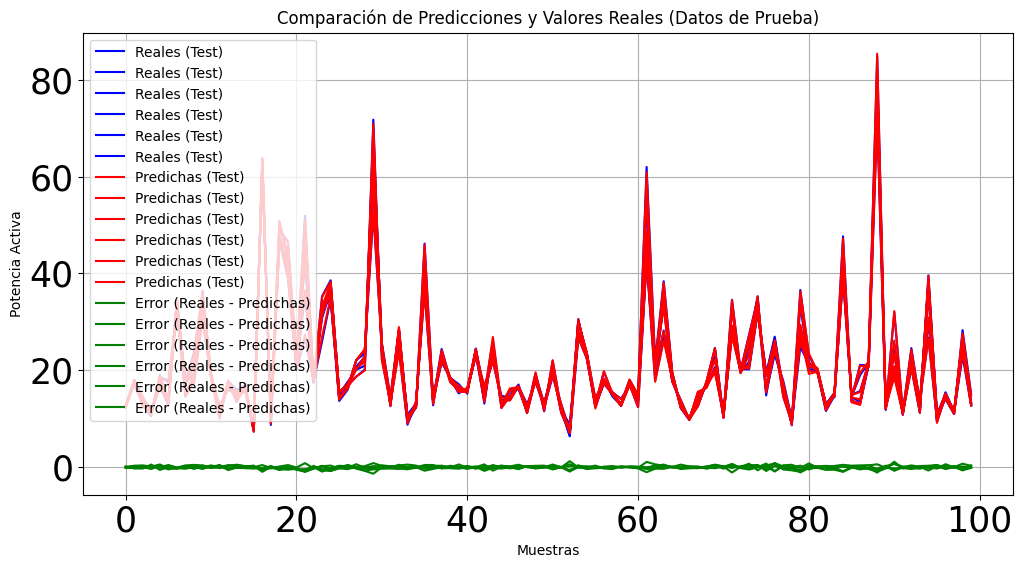

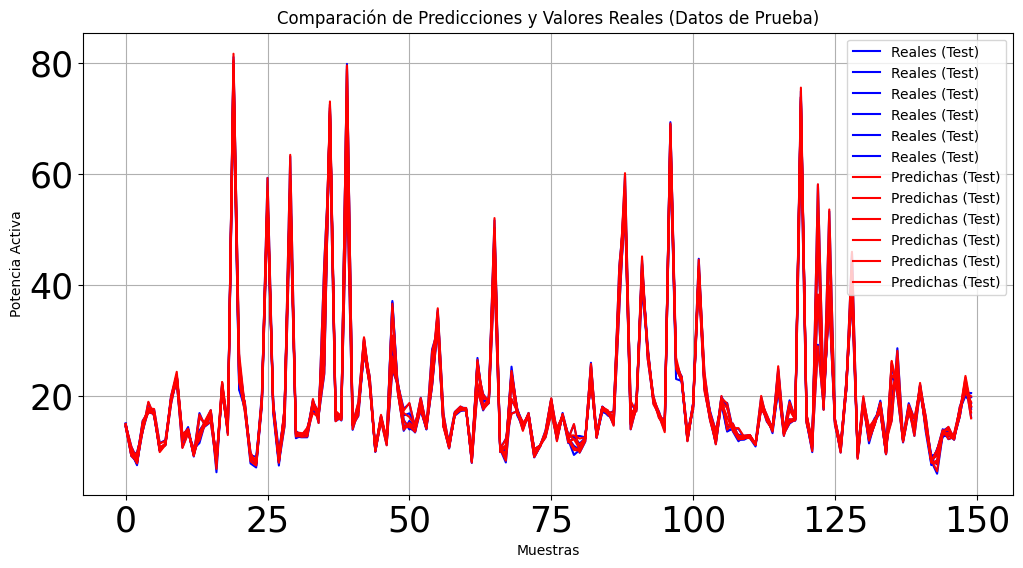

[[-0.04942213 -0.14916805  0.12590723 -0.04541798 -0.02518075 -0.14852753]
 [-0.4758596  -0.05304332  0.24462483  0.24414825 -0.17388202 -0.02819769]
 [-0.22110634  0.41116047 -0.17145227 -0.02383829 -0.1756183   0.13301148]
 ...
 [-0.3451956  -0.00273576 -0.05839113 -0.1710936  -0.44803561 -0.4558669 ]
 [ 0.1608923  -0.19262476  0.21806289 -0.1585922   0.07239908 -0.11974832]
 [-0.17632252 -0.11164306  0.08712183  0.09014885 -0.26481653 -0.0977397 ]]


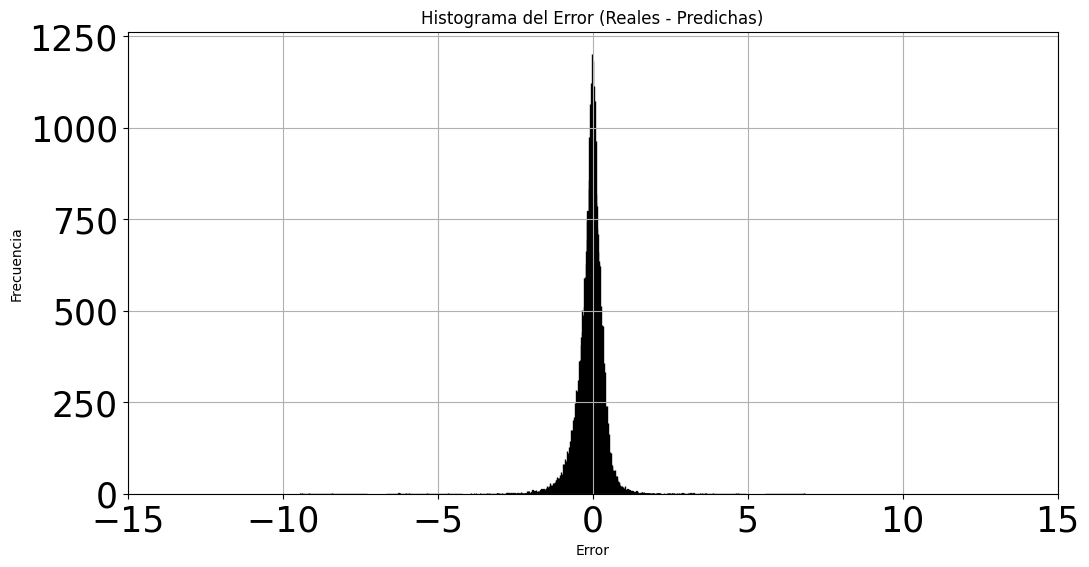

In [23]:

# Plot de datos de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)', marker='o')
plt.plot(y_test_pred, label='Predicted (Train)', marker='x')
plt.title('Comparación de Predicciones y Valores Reales (Datos de Entrenamiento)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')
plt.legend()
plt.grid(True)
plt.show()

# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los datos reales y predichos como líneas
plt.plot(y_test, label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred, label='Predichas (Test)', linestyle='-', color='red')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()



# Calculamos el error (diferencia entre los valores reales y predichos)
error = y_test[:50] - y_test_pred[:50]

# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los primeros 50 datos reales y predichos como líneas
plt.plot(y_test[:50], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[:50], label='Predichas (Test)', linestyle='-', color='red')

# Ploteamos el error como línea
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()






# Plot de datos de prueba
plt.figure(figsize=(12, 6))

error = y_test[50:100] - y_test_pred[50:100]

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[50:100], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[50:100], label='Predichas (Test)', linestyle='-', color='red')
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


# Plot de datos de prueba
plt.figure(figsize=(12, 6))
error = y_test[300:400] - y_test_pred[300:400]

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[300:400], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[300:400], label='Predichas (Test)', linestyle='-', color='red')
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()





# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[850:1000], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[850:1000], label='Predichas (Test)', linestyle='-', color='red')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


error = y_test - y_test_pred
print((error))


# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error, bins=500, edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma del Error (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.grid(True)
plt.show()

In [58]:
y_test

array([[22.476, 22.2  ],
       [35.688, 35.7  ],
       [21.72 , 21.324],
       ...,
       [14.148, 14.844],
       [15.696, 14.22 ],
       [17.412, 17.196]])

[-0.04942213 -0.4758596  -0.22110634 ... -0.3451956   0.1608923
 -0.17632252]
Desviación estándar del error: 0.33
medio del error: -0.07


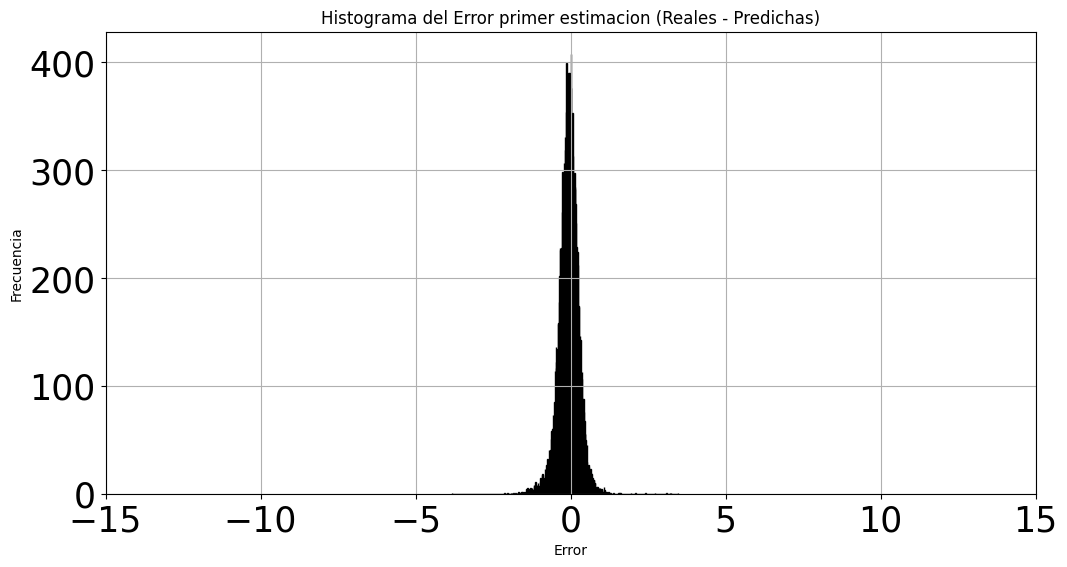

In [25]:
error1 = y_test[:,0] - y_test_pred[:,0]
print((error1))


# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error1, bins=500, edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma del Error primer estimacion (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

std_deviation1 = np.std(error1)
std_mean1 = np.mean(error1)


print(f"Desviación estándar del error: {std_deviation1:.2f}")
print(f"medio del error: {std_mean1:.2f}")

# Mostramos el gráfico
plt.grid(True)
plt.show()


[-0.04942213 -0.4758596  -0.22110634 ... -0.3451956   0.1608923
 -0.17632252]
medio del error: -0.12
Desviación estándar del error: 0.47


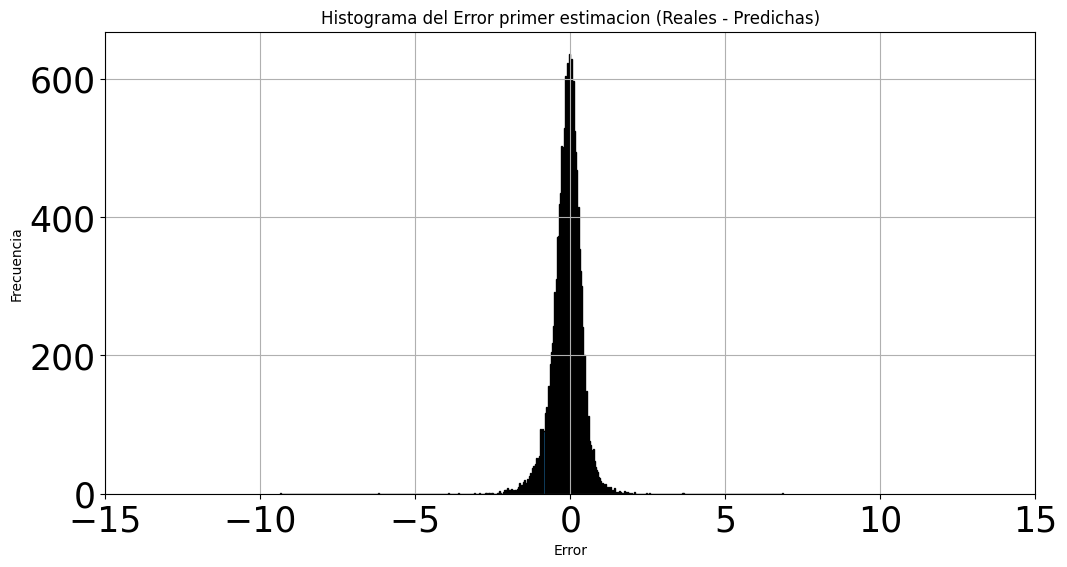

In [26]:
error2 = y_test[:,1] - y_test_pred[:,1]
print((error1))


# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error2, bins=500, edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma del Error primer estimacion (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

std_deviation2 = np.std(error2)
std_mean2 = np.mean(error2)


print(f"medio del error: {std_mean2:.2f}")

print(f"Desviación estándar del error: {std_deviation2:.2f}")

# Mostramos el gráfico
plt.grid(True)
plt.show()


[ 0.12590723  0.24462483 -0.17145227 ... -0.05839113  0.21806289
  0.08712183]
medio del error: 0.03
Desviación estándar del error: 0.33


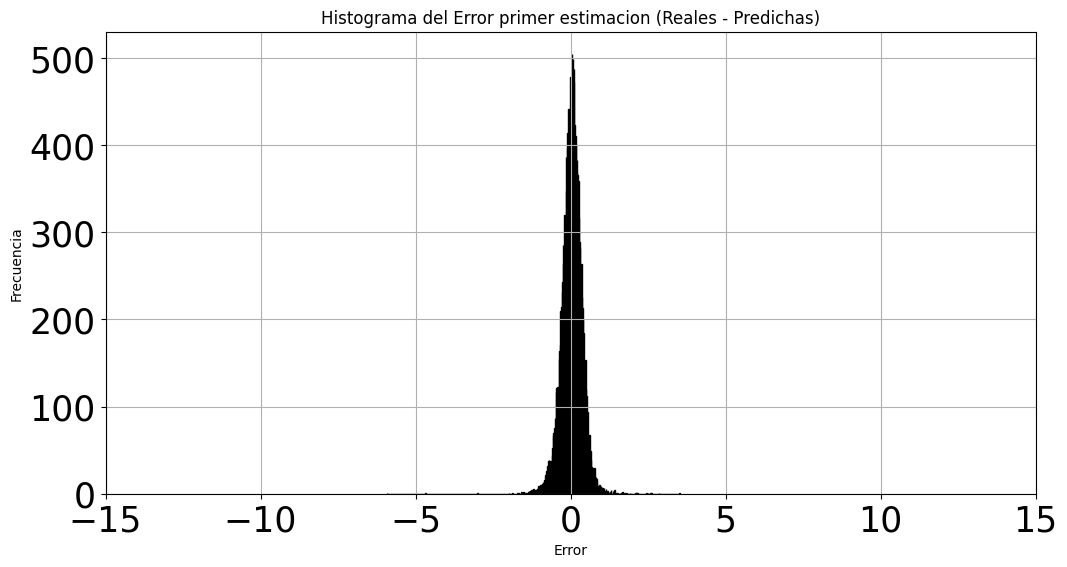

In [27]:
error3 = y_test[:,2] - y_test_pred[:,2]
print((error3))


# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error3, bins=500, edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma del Error primer estimacion (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

std_deviation3 = np.std(error3)
std_mean3 = np.mean(error3)


print(f"medio del error: {std_mean3:.2f}")

print(f"Desviación estándar del error: {std_deviation3:.2f}")

# Mostramos el gráfico
plt.grid(True)
plt.show()

In [53]:
std_deviation = np.std(error)

print(f"Desviación estándar del error: {std_deviation:.2f}")

Desviación estándar del error: 0.28


In [54]:
error

array([[ 0.0968801 , -0.31779865,  0.00216703,  0.02307491,  0.01824958,
        -0.05910244],
       [ 0.19291548, -0.16438861, -0.07043769,  0.06567191, -0.20231487,
        -0.36439458],
       [ 0.13154144, -0.14436626, -0.04724477,  0.15049432,  0.15047156,
        -0.07615218],
       ...,
       [ 0.01442926, -0.20512071, -0.19026331, -0.00129951, -0.36653842,
        -0.51839551],
       [-0.0116455 , -0.12166472,  0.04374839,  0.04454901,  0.09497541,
        -0.09452745],
       [ 0.25097412, -0.0043814 , -0.1677543 , -0.10144909, -0.14546514,
        -0.22408438]])

In [64]:
error

array([[ 0.0968801 , -0.31779865,  0.00216703,  0.02307491,  0.01824958,
        -0.05910244],
       [ 0.19291548, -0.16438861, -0.07043769,  0.06567191, -0.20231487,
        -0.36439458],
       [ 0.13154144, -0.14436626, -0.04724477,  0.15049432,  0.15047156,
        -0.07615218],
       ...,
       [ 0.01442926, -0.20512071, -0.19026331, -0.00129951, -0.36653842,
        -0.51839551],
       [-0.0116455 , -0.12166472,  0.04374839,  0.04454901,  0.09497541,
        -0.09452745],
       [ 0.25097412, -0.0043814 , -0.1677543 , -0.10144909, -0.14546514,
        -0.22408438]])

In [71]:
min_error = np.min(error)
max_error = np.max(error)


# Encontrar los índices de los valores que tienen un valor absoluto mayor que 1
indices = np.where(np.abs(error) > 2)
# Contar cuántos valores cumplen la condición
cont = len(indices[0])

with open("resultados.txt", "w") as file:
    file.write(f"Valor minimo del error: {min_error}\n")
    file.write(f"Valor maximo del error: {max_error}\n")
    file.write(f"Cantidad de valores con modulo mayor que el elegido: {cont}\n")

    file.write("Posiciones y valores:\n")
    for i in range(cont):
        row = indices[0][i]
        col = indices[1][i]
        file.write(f"indice: ({row}, {col}), Valor: {error[row, col]}\n")


In [55]:
y_test

array([[11.844, 11.868, 12.096, 12.3  , 12.672, 12.6  ],
       [ 8.04 ,  8.448,  8.628,  8.592,  8.388,  8.784],
       [11.7  , 12.   , 11.964, 12.036, 11.064, 12.048],
       ...,
       [22.476, 22.044, 22.164, 22.86 , 23.508, 22.512],
       [12.708, 12.096, 12.612, 13.224, 13.236, 12.984],
       [10.44 , 10.668, 11.064, 10.92 , 10.944, 11.796]])

In [56]:
y_test_pred

array([[11.74712  , 12.185799 , 12.093833 , 12.276925 , 12.65375  ,
        12.659102 ],
       [ 7.8470845,  8.612389 ,  8.698438 ,  8.526328 ,  8.590315 ,
         9.148395 ],
       [11.568459 , 12.144366 , 12.011245 , 11.885506 , 10.913528 ,
        12.124152 ],
       ...,
       [22.46157  , 22.24912  , 22.354263 , 22.8613   , 23.874538 ,
        23.030396 ],
       [12.7196455, 12.217665 , 12.568252 , 13.179451 , 13.141025 ,
        13.078527 ],
       [10.189026 , 10.672381 , 11.231754 , 11.021449 , 11.089465 ,
        12.020084 ]], dtype=float32)